<a href="https://colab.research.google.com/github/nguyenthanhphat-144/Tuan5_TTNT/blob/main/tu%E1%BA%A7n5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1711991976.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


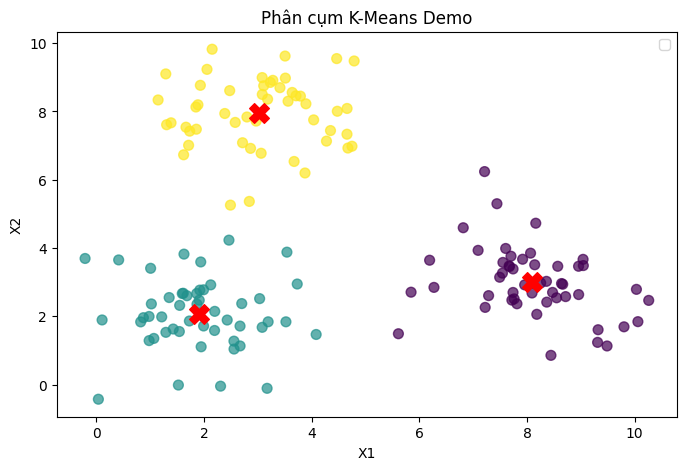

In [1]:
import numpy as np
import random
import math

class KMeans:
    """
    Cài đặt thuật toán K-Means (Phân cụm).
    """
    def __init__(self, k=3, max_iters=100, random_state=None):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.random_state = random_state

    def _euclidean_distance(self, x1, x2):
        """Tính khoảng cách Euclidean giữa hai điểm."""
        return np.sqrt(np.sum((x1 - x2)**2))

    def fit(self, X):
        """Khởi tạo và chạy thuật toán K-Means."""
        if self.random_state is not None:
            np.random.seed(self.random_state)

        n_samples = X.shape[0]

        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):

            cluster_assignments = self._create_clusters(X)

            old_centroids = self.centroids
            self.centroids = self._update_centroids(X, cluster_assignments)

            if self._is_converged(old_centroids, self.centroids):
                break

        return self.centroids

    def _create_clusters(self, X):
        """Gán mỗi điểm dữ liệu vào centroid gần nhất."""
        cluster_assignments = []
        for sample in X:
            distances = [self._euclidean_distance(sample, centroid) for centroid in self.centroids]
            closest_centroid_index = np.argmin(distances)
            cluster_assignments.append(closest_centroid_index)
        return np.array(cluster_assignments)

    def _update_centroids(self, X, cluster_assignments):
        """Tính toán vị trí mới của các centroids (tâm cụm)."""
        new_centroids = np.zeros((self.k, X.shape[1]))
        for idx in range(self.k):
            points_in_cluster = X[cluster_assignments == idx]
            if len(points_in_cluster) > 0:
                new_centroids[idx] = np.mean(points_in_cluster, axis=0)
            else:
                new_centroids[idx] = self.centroids[idx]
        return new_centroids

    def _is_converged(self, old_centroids, new_centroids):
        """Kiểm tra xem các centroids có ngừng di chuyển không."""
        distances = [self._euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def predict(self, X):
        """Dự đoán cluster cho các điểm mới hoặc điểm huấn luyện."""
        return self._create_clusters(X)
if __name__ == '__main__':
    X = np.concatenate([
        np.random.normal(loc=[2, 2], scale=1, size=(50, 2)),
        np.random.normal(loc=[8, 3], scale=1, size=(50, 2)),
        np.random.normal(loc=[3, 8], scale=1, size=(50, 2))
    ])

    kmeans = KMeans(k=3, random_state=42)
    kmeans.fit(X)

    clusters = kmeans.predict(X)

    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(8, 5))
        plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
        plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
                    marker='X', s=200, c='red')
        plt.title("Phân cụm K-Means Demo")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.legend()
        plt.show()
    except ImportError:
        print("\nCần thư viện Matplotlib để trực quan hóa.")
        print("Centroids cuối cùng:\n", kmeans.centroids)

In [2]:
import numpy as np
from collections import Counter

class KNN:
    """
    Cài đặt thuật toán K-Nearest Neighbors (k-NN).
    Hỗ trợ hai phương pháp trọng số: 'uniform' và 'distance'.
    """
    def __init__(self, k=5, weight_method='uniform'):
        self.k = k
        self.weight_method = weight_method
        self.X_train = None
        self.y_train = None

    def _euclidean_distance(self, x1, x2):
        """Tính khoảng cách Euclidean giữa hai điểm."""
        return np.sqrt(np.sum((x1 - x2)**2))

    def fit(self, X, y):
        """Lưu trữ tập dữ liệu huấn luyện."""
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """Dự đoán nhãn cho một tập hợp các điểm."""
        y_pred = [self._predict_single_sample(x) for x in X]
        return np.array(y_pred)

    def _predict_single_sample(self, x):
        """Dự đoán nhãn cho một điểm dữ liệu duy nhất."""

        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        k_nearest_distances = [distances[i] for i in k_indices]

        if self.weight_method == 'uniform':
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]

        elif self.weight_method == 'distance':
            class_votes = {}
            for label in np.unique(self.y_train):
                class_votes[label] = 0.0
            for label, dist in zip(k_nearest_labels, k_nearest_distances):
                if dist < 1e-6:
                    weight = 1.0
                else:
                    weight = 1.0 / (dist**2)

                class_votes[label] += weight

            predicted_label = max(class_votes, key=class_votes.get)
            return predicted_label

        else:
            raise ValueError("Phương pháp trọng số không hợp lệ. Chỉ chấp nhận 'uniform' hoặc 'distance'.")
if __name__ == '__main__':
    X_train = np.array([
        [1.0, 1.0], [1.5, 1.8], [5.0, 8.0], [8.0, 8.0], [1.0, 0.6],
        [9.0, 11.0], [0.8, 1.2], [10.0, 10.0]
    ])
    y_train = np.array([0, 0, 1, 1, 0, 1, 0, 1])

    X_test = np.array([
        [2.0, 2.0]
    ])

    print("Dữ liệu huấn luyện:\n", X_train)
    print("Nhãn huấn luyện:\n", y_train)
    print("Điểm cần dự đoán (X_test):", X_test[0])

    print("\n--- K-NN (k=3) ---")

    knn_uniform = KNN(k=3, weight_method='uniform')
    knn_uniform.fit(X_train, y_train)
    pred_uniform = knn_uniform.predict(X_test)
    print(f"1. Uniform Weighting: Dự đoán = {pred_uniform[0]}")

    knn_distance = KNN(k=3, weight_method='distance')
    knn_distance.fit(X_train, y_train)
    pred_distance = knn_distance.predict(X_test)
    print(f"2. Distance Weighting: Dự đoán = {pred_distance[0]}")

Dữ liệu huấn luyện:
 [[ 1.   1. ]
 [ 1.5  1.8]
 [ 5.   8. ]
 [ 8.   8. ]
 [ 1.   0.6]
 [ 9.  11. ]
 [ 0.8  1.2]
 [10.  10. ]]
Nhãn huấn luyện:
 [0 0 1 1 0 1 0 1]
Điểm cần dự đoán (X_test): [2. 2.]

--- K-NN (k=3) ---
1. Uniform Weighting: Dự đoán = 0
2. Distance Weighting: Dự đoán = 0


--- CHẠY DEMO K-MEANS ---


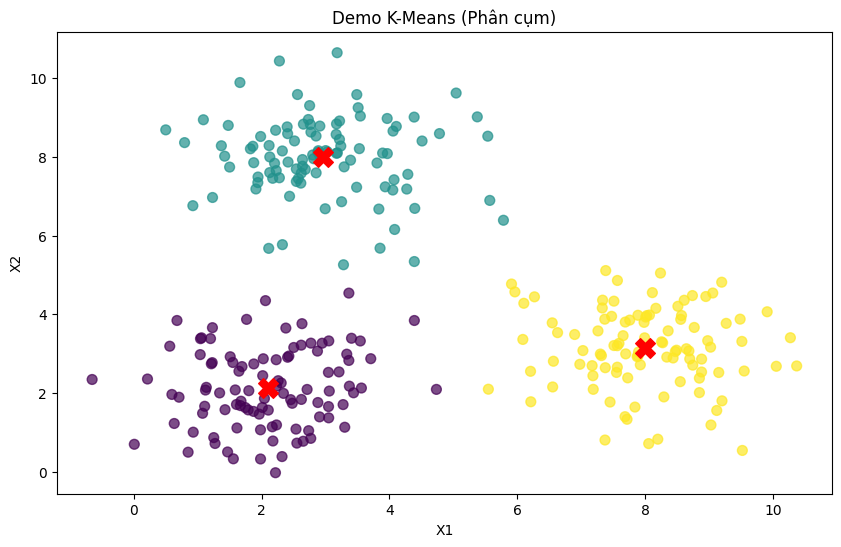


--- CHẠY DEMO K-NN ---
Accuracy (Distance Weighting): 0.8833


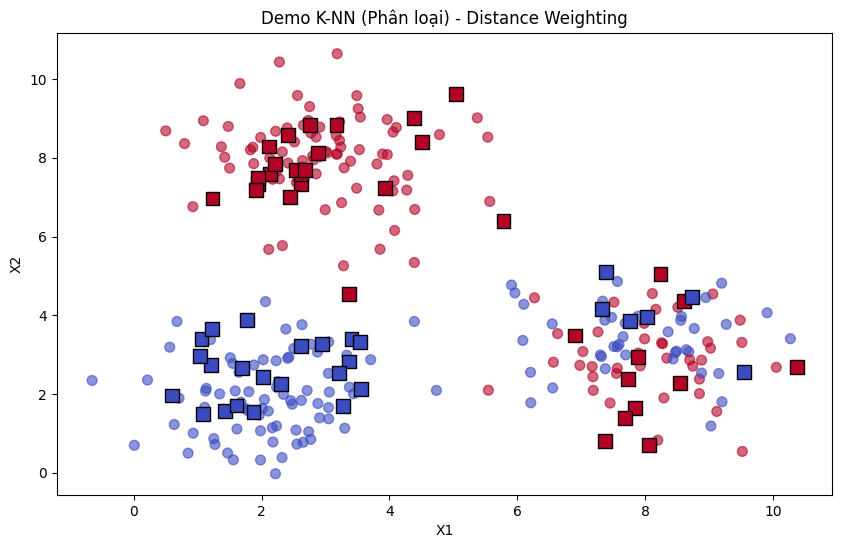

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
import copy
import math

# --- BÀI 1: Lớp K-MEANS (Sử dụng lại từ Bài 1) ---

class KMeans:
    def __init__(self, k=3, max_iters=100, random_state=None):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.random_state = random_state

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def fit(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        n_samples = X.shape[0]
        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            cluster_assignments = self._create_clusters(X)
            old_centroids = self.centroids
            self.centroids = self._update_centroids(X, cluster_assignments)
            if self._is_converged(old_centroids, self.centroids):
                break
        return self.centroids

    def _create_clusters(self, X):
        cluster_assignments = []
        for sample in X:
            distances = [self._euclidean_distance(sample, centroid) for centroid in self.centroids]
            closest_centroid_index = np.argmin(distances)
            cluster_assignments.append(closest_centroid_index)
        return np.array(cluster_assignments)

    def _update_centroids(self, X, cluster_assignments):
        new_centroids = np.zeros((self.k, X.shape[1]))
        for idx in range(self.k):
            points_in_cluster = X[cluster_assignments == idx]
            if len(points_in_cluster) > 0:
                new_centroids[idx] = np.mean(points_in_cluster, axis=0)
            else:
                new_centroids[idx] = self.centroids[idx]
        return new_centroids

    def _is_converged(self, old_centroids, new_centroids):
        distances = [self._euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def predict(self, X):
        return self._create_clusters(X)

# --- BÀI 2: Lớp K-NN (Sử dụng lại từ Bài 2) ---

class KNN:
    def __init__(self, k=5, weight_method='uniform'):
        self.k = k
        self.weight_method = weight_method
        self.X_train = None
        self.y_train = None

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict_single_sample(x) for x in X]
        return np.array(y_pred)

    def _predict_single_sample(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        k_nearest_distances = [distances[i] for i in k_indices]

        if self.weight_method == 'uniform':
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]

        elif self.weight_method == 'distance':
            class_votes = {}
            for label in np.unique(self.y_train):
                class_votes[label] = 0.0

            for label, dist in zip(k_nearest_labels, k_nearest_distances):
                if dist < 1e-6:
                    weight = 1.0
                else:
                    weight = 1.0 / (dist**2)
                class_votes[label] += weight

            predicted_label = max(class_votes, key=class_votes.get)
            return predicted_label

        else:
            raise ValueError("Phương pháp trọng số không hợp lệ.")


# --- BÀI 3: ỨNG DỤNG DEMO ---

def generate_data(n_samples=300):
    X = np.concatenate([
        np.random.normal(loc=[2, 2], scale=1, size=(n_samples // 3, 2)),
        np.random.normal(loc=[8, 3], scale=1, size=(n_samples // 3, 2)),
        np.random.normal(loc=[3, 8], scale=1, size=(n_samples // 3, 2))
    ])
    y = np.array([0] * (n_samples // 2) + [1] * (n_samples - n_samples // 2))

    shuffler = np.random.permutation(len(X))
    X = X[shuffler]
    y = y[shuffler]

    return X, y

def run_kmeans_demo(X):
    kmeans = KMeans(k=3, random_state=42)
    kmeans.fit(X)
    clusters = kmeans.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
                marker='X', s=200, c='red')
    plt.title("Demo K-Means (Phân cụm)")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

def run_knn_demo(X, y):
    split_ratio = 0.8
    split_index = int(split_ratio * len(X))

    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    knn_distance = KNN(k=5, weight_method='distance')
    knn_distance.fit(X_train, y_train)
    y_pred_distance = knn_distance.predict(X_test)
    accuracy_distance = np.mean(y_pred_distance == y_test)

    print(f"Accuracy (Distance Weighting): {accuracy_distance:.4f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=50, alpha=0.6)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_distance, cmap='coolwarm',
                marker='s', s=100, edgecolors='black')

    plt.title("Demo K-NN (Phân loại) - Distance Weighting")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()


if __name__ == '__main__':
    # Tạo dữ liệu
    X, y = generate_data(n_samples=300)

    print("--- CHẠY DEMO K-MEANS ---")
    run_kmeans_demo(X)

    print("\n--- CHẠY DEMO K-NN ---")
    run_knn_demo(X, y)

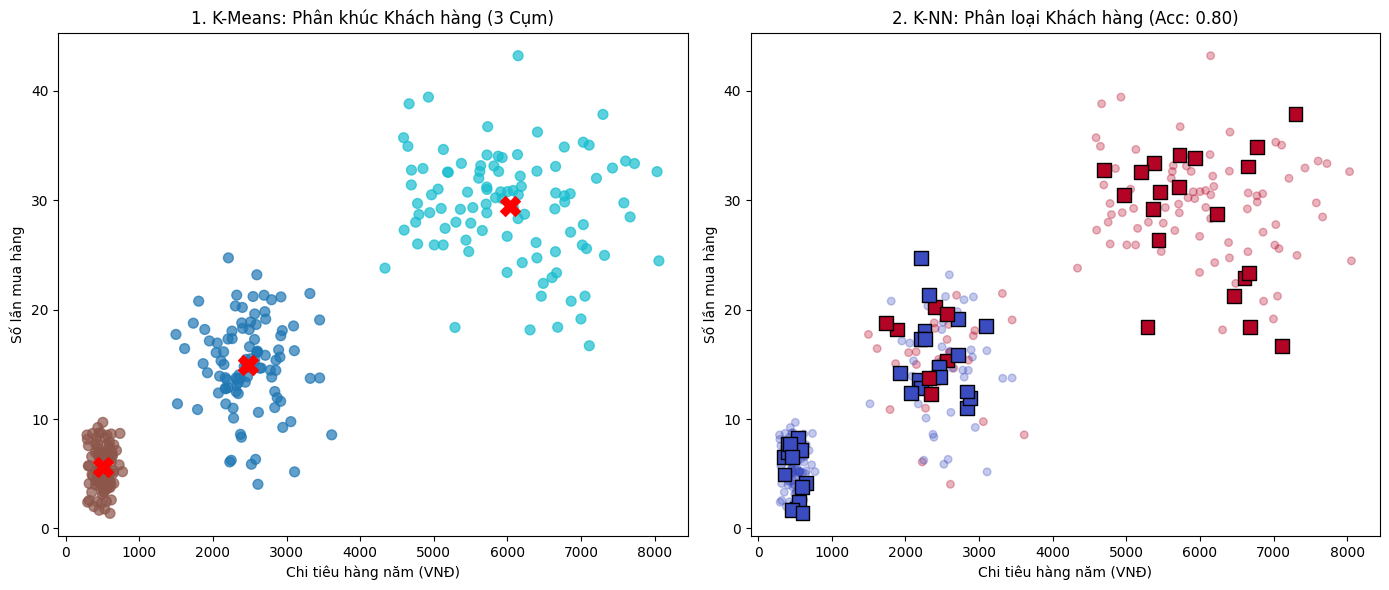

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
import copy
import math

# --- LỚP K-MEANS VÀ K-NN (Giả định đã được định nghĩa như Bài 1 & 2) ---

# [Toàn bộ định nghĩa lại lớp KMeans và KNN đã được cung cấp trước đó
# sẽ được đặt ở đây nếu là một file Python độc lập]

# Do giới hạn không gian, chúng ta sẽ định nghĩa lại hàm tạo dữ liệu và demo chính:


class KMeans:
    def __init__(self, k=3, max_iters=100, random_state=None):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        if random_state is not None:
            np.random.seed(random_state)

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def fit(self, X):
        n_samples = X.shape[0]
        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]
        for _ in range(self.max_iters):
            cluster_assignments = self._create_clusters(X)
            old_centroids = self.centroids
            new_centroids = np.zeros((self.k, X.shape[1]))
            for idx in range(self.k):
                points = X[cluster_assignments == idx]
                if len(points) > 0:
                    new_centroids[idx] = np.mean(points, axis=0)
                else:
                    new_centroids[idx] = self.centroids[idx]
            self.centroids = new_centroids
            distances = [self._euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(self.k)]
            if sum(distances) == 0: break
        return self.centroids
    def _create_clusters(self, X):
        cluster_assignments = []
        for sample in X:
            distances = [self._euclidean_distance(sample, c) for c in self.centroids]
            cluster_assignments.append(np.argmin(distances))
        return np.array(cluster_assignments)
    def predict(self, X):
        return self._create_clusters(X)

class KNN:
    def __init__(self, k=5, weight_method='uniform'):
        self.k = k
        self.weight_method = weight_method
        self.X_train = None
        self.y_train = None

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        y_pred = [self._predict_single_sample(x) for x in X]
        return np.array(y_pred)
    def _predict_single_sample(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        k_nearest_distances = [distances[i] for i in k_indices]
        if self.weight_method == 'uniform':
            return Counter(k_nearest_labels).most_common(1)[0][0]
        elif self.weight_method == 'distance':
            class_votes = {label: 0.0 for label in np.unique(self.y_train)}
            for label, dist in zip(k_nearest_labels, k_nearest_distances):
                weight = 1.0 / (dist**2) if dist >= 1e-6 else 1.0
                class_votes[label] += weight
            return max(class_votes, key=class_votes.get)

# --- PHẦN DEMO CHÍNH ---

def generate_customer_data(n_samples=300):
    """Tạo dữ liệu giả lập khách hàng: (Chi tiêu hàng năm, Số lần mua hàng)."""

    # 3 Cụm: (Thấp, Trung bình, Cao) - cho K-Means
    X_low = np.random.normal(loc=[500, 5], scale=[100, 2], size=(100, 2))
    X_mid = np.random.normal(loc=[2500, 15], scale=[400, 4], size=(100, 2))
    X_high = np.random.normal(loc=[6000, 30], scale=[800, 5], size=(100, 2))

    X = np.concatenate([X_low, X_mid, X_high])

    # Nhãn giả lập: 0=Low Value, 1=High Value (cho K-NN)
    y_knn = np.array([0] * 150 + [1] * 150)

    shuffler = np.random.permutation(len(X))
    X = X[shuffler]
    y_knn = y_knn[shuffler]

    return X, y_knn

def run_customer_analysis_demo():
    X, y_knn = generate_customer_data()

    # --- Demo 1: Customer Segmentation (K-Means) ---
    kmeans = KMeans(k=3, random_state=42)
    kmeans.fit(X)
    clusters = kmeans.predict(X)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='tab10', s=50, alpha=0.7)
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
                marker='X', s=200, c='red')
    plt.title("1. K-Means: Phân khúc Khách hàng (3 Cụm)")
    plt.xlabel("Chi tiêu hàng năm (VNĐ)")
    plt.ylabel("Số lần mua hàng")

    # --- Demo 2: Customer Classification (K-NN) ---
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y_knn[:split_index], y_knn[split_index:]

    knn = KNN(k=5, weight_method='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = np.mean(y_pred == y_test)

    plt.subplot(1, 2, 2)
    # Vẽ các điểm kiểm thử (Tô màu theo dự đoán K-NN)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=30, alpha=0.3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm',
                marker='s', s=100, edgecolors='black')
    plt.title(f"2. K-NN: Phân loại Khách hàng (Acc: {accuracy:.2f})")
    plt.xlabel("Chi tiêu hàng năm (VNĐ)")
    plt.ylabel("Số lần mua hàng")

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    run_customer_analysis_demo()

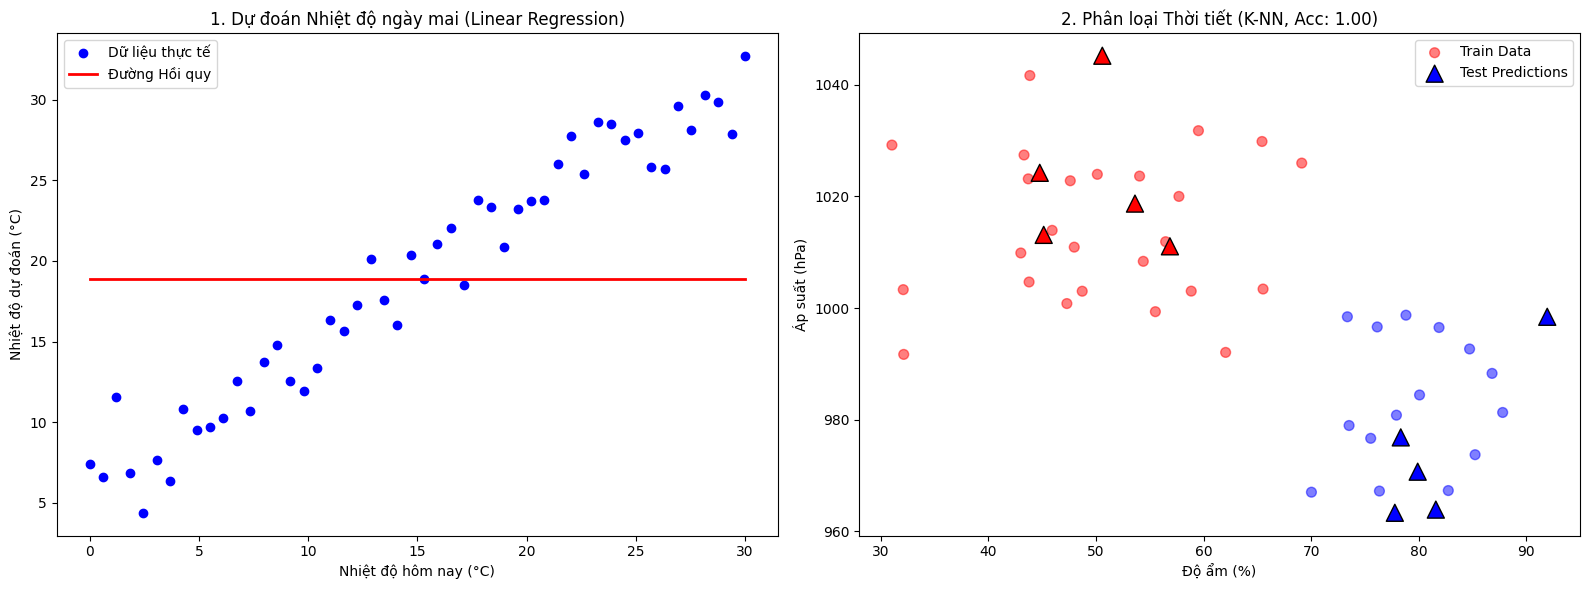

In [5]:
#Bài 5
# --- Bổ sung Lớp Linear Regression ---

class LinearRegression:
    """
    Cài đặt Hồi quy Tuyến tính (Least Squares Method).
    Giả định dữ liệu 1D (y = mx + b).
    """
    def __init__(self):
        self.m = 0 # Hệ số (slope)
        self.b = 0 # Độ lệch (intercept)

    def fit(self, X, y):
        # Đảm bảo X là mảng 1D
        X_flat = X.flatten()

        n = len(X_flat)
        mean_x = np.mean(X_flat)
        mean_y = np.mean(y)

        # Tính toán hệ số m (slope)
        numerator = np.sum((X_flat - mean_x) * (y - mean_y))
        denominator = np.sum((X_flat - mean_x)**2)

        if denominator == 0:
            self.m = 0
            self.b = mean_y
        else:
            self.m = numerator / denominator
            # Tính toán độ lệch b (intercept)
            self.b = mean_y - (self.m * mean_x)

    def predict(self, X):
        X_flat = X.flatten()
        return self.m * X_flat + self.b

# --- PHẦN DEMO CHÍNH ---

def generate_climate_data(n_samples=50):
    """Tạo dữ liệu khí hậu giả lập."""

    # 1. Dữ liệu Hồi quy (Nhiệt độ dự đoán)
    # Đầu vào: Nhiệt độ hôm nay (0-30 độ C)
    X_temp = np.linspace(0, 30, n_samples).reshape(-1, 1)
    # Đầu ra: Nhiệt độ ngày mai (có nhiễu)
    y_temp = X_temp * 0.9 + 5 + np.random.normal(0, 2, size=(n_samples, 1))

    # 2. Dữ liệu Phân loại (Loại thời tiết)
    # Đầu vào: Độ ẩm (0-100), Áp suất (950-1050)
    X_weather = np.concatenate([
        np.random.normal(loc=[80, 980], scale=[5, 10], size=(20, 2)), # Mưa (Nhãn 0)
        np.random.normal(loc=[50, 1010], scale=[10, 15], size=(30, 2))  # Nắng/Mây (Nhãn 1)
    ])
    y_weather = np.array([0] * 20 + [1] * 30)

    shuffler = np.random.permutation(len(X_weather))
    X_weather = X_weather[shuffler]
    y_weather = y_weather[shuffler]

    return X_temp, y_temp, X_weather, y_weather

def run_climate_demo():
    X_temp, y_temp, X_weather, y_weather = generate_climate_data()

    plt.figure(figsize=(16, 6))

    # --- Demo 1: Dự đoán Nhiệt độ (Linear Regression) ---
    lr = LinearRegression()
    lr.fit(X_temp, y_temp)
    y_pred_lr = lr.predict(X_temp)

    plt.subplot(1, 2, 1)
    plt.scatter(X_temp, y_temp, color='blue', label='Dữ liệu thực tế')
    plt.plot(X_temp, y_pred_lr, color='red', linewidth=2, label='Đường Hồi quy')
    plt.title("1. Dự đoán Nhiệt độ ngày mai (Linear Regression)")
    plt.xlabel("Nhiệt độ hôm nay (°C)")
    plt.ylabel("Nhiệt độ dự đoán (°C)")
    plt.legend()


    # --- Demo 2: Phân loại Thời tiết (K-NN) ---
    X_train, X_test = X_weather[:40], X_weather[40:]
    y_train, y_test = y_weather[:40], y_weather[40:]

    knn = KNN(k=3, weight_method='uniform')
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy_knn = np.mean(y_pred_knn == y_test)

    plt.subplot(1, 2, 2)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=50, alpha=0.5, label='Train Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_knn, cmap='bwr', marker='^', s=150, edgecolors='black', label='Test Predictions')
    plt.title(f"2. Phân loại Thời tiết (K-NN, Acc: {accuracy_knn:.2f})")
    plt.xlabel("Độ ẩm (%)")
    plt.ylabel("Áp suất (hPa)")
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    run_climate_demo()